


<h1>
<hr style=" border:none; height:3px;">
<center>Exam MAP 670 Causality</center>
<hr style=" border:none; height:3px;">
</h1>

<h6><center>Exercise 2</center></h6>

# Setup

In [1]:
!pip install jedi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install git+https://github.com/py-why/dowhy@main

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/py-why/dowhy (to revision main) to /tmp/pip-req-build-vm1qsmp_
  Running command git clone --filter=blob:none --quiet https://github.com/py-why/dowhy /tmp/pip-req-build-vm1qsmp_
  Resolved https://github.com/py-why/dowhy to commit eae59d1c95937e2f0c3dfbd3a0369ad05b0ea7cb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


First we import the libraries.

In [3]:
import logging
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import graphviz as gr
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

import dowhy

We will try estimating the impact of years of education on the hourly wage from observational data. We will use the wage dataset that includes log-hourly wage considered to be our outcome $y$, the number of years of education considered the treatment $w$ plus some covariates, mainly IQ, experience, tenure, marital status, evolving in an urban area or not ...

<div class="alert alert-block alert-success">

**Question 1.** Import `wage` dataset and apply adequate panda function for removing missing values. Note that its default option will automatically determine if rows or columns which contain missing values are removed.

</div>


In [31]:
dataset = pd.read_csv('/content/wages.csv')
dataset.head()

,wage,hours,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc
0,769,40,2.956212,93,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0
1,808,50,2.782539,119,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0
2,825,40,3.026504,108,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0
3,650,40,2.788093,96,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0
4,562,40,2.642622,74,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0


In [32]:
dataset.dropna(inplace=True)

In [28]:
# dataset.loc[dataset.educ > 12, "educ"] = 1
# dataset.loc[dataset.educ <= 12, "educ"] = 0

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 931
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     663 non-null    int64  
 1   hours    663 non-null    int64  
 2   lhwage   663 non-null    float64
 3   IQ       663 non-null    float64
 4   educ     663 non-null    int64  
 5   exper    663 non-null    int64  
 6   tenure   663 non-null    int64  
 7   age      663 non-null    int64  
 8   married  663 non-null    int64  
 9   black    663 non-null    int64  
 10  south    663 non-null    int64  
 11  urban    663 non-null    int64  
 12  sibs     663 non-null    int64  
 13  brthord  663 non-null    float64
 14  meduc    663 non-null    float64
 15  feduc    663 non-null    float64
dtypes: float64(5), int64(11)
memory usage: 88.1 KB


# Task 1: Regress outcome only on treatment in a linear fashion

<div class="alert alert-block alert-success">

**Question 2.** Using statmodels library, perform a regression of `wage` on `educ` and show results. The associated regression model will be called `model_1`. 

</div>

In [34]:
model_1 = smf.ols('wage ~ educ', data=dataset)
model_1.fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,175.1600,92.839,1.887,0.060,-7.134,357.454
educ,59.4518,6.698,8.876,0.000,46.300,72.604


### Interpret the regression parameter value ?

Your answer :

It shows that one more year of education could bring 59.5 on average of wages. If someone takes no education, he would has 175.2 as basic wage. The p-value of this parameter is low, meaning that it is significantly not zero. The education do has an effect on wage.

# Task 2: Estimation in the presence of a confounder

We are going to take into consideration the presence of the confounder IQ. In general, the higher the IQ, the more likely the hourly wage is higher, and the more education level is up, and vice versa. \
We can illustrate the dependencies in the following causal graph :

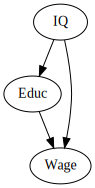

In [14]:
g = gr.Digraph()
g.edge("IQ", "Educ"), g.edge("IQ", "Wage"), g.edge("Educ", "Wage")
g

<div class="alert alert-block alert-success">

**Question 3.** Regress the outcome `wage` on treatement `educ`and confounder `IQ`. The model will be called `model_2`. 
</div>

In [35]:
model_2 = smf.ols('wage ~ educ + IQ', data=dataset)
model_2.fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-99.5510,111.825,-0.890,0.374,-319.127,120.025
educ,41.1024,7.876,5.219,0.000,25.637,56.568
IQ,5.1301,1.197,4.287,0.000,2.780,7.480


### What is the interpretation of the regression parameter associated to treatement ? 

<div class="alert alert-block alert-success">

**Question 4.** Interpret the regression parameter associated to treatement ? 
</div>

Write your answer here:

It shows that one more year of education could bring 41.1 on average of wages. Moreover, if IQ increases by 1, the wage increase 5.1 on average. 

The effect of the treatment (education) becomes weaker. Because we have considered one more variable (IQ) which is a confounding factor, i.e. influences both treatment and target.

<div class="alert alert-block alert-success">

**Question 5.** Assuming everything goes well, compute the average treatment effect ATE. You can also check the result using the library `dowhy` only on the subgraph
</div>

Write your answer here:

ATE equals to the coefficient before "educ". Thus, ATE = 41.1

## Task: Estimation in the presence of other covariates

<div class="alert alert-block alert-success">

**Question 6.**  Regress this time while adding the following covariates `IQ`, `exper`, `tenure`, `age`, `married`, `black`, `south`, `urban`, `sibs`, `brthord`, `meduc`, `feduc`. But, before to regress, take time to centering them for fixing the multicollinearity. The regression model will be called `model_3`. 
</div>

In [39]:
cols = ["IQ", "exper", "tenure", "age", "brthord"]
for col in cols:
  dataset[col] -= dataset[col].mean()

In [40]:
model_3 = smf.ols('wage ~ educ + IQ + exper + tenure + age + married + black + south + urban + sibs + brthord', data=dataset)
model_3.fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,47.0937,131.982,0.357,0.721,-212.067,306.255
educ,47.3124,8.673,5.455,0.000,30.282,64.343
IQ,4.0323,1.203,3.351,0.001,1.670,6.395
exper,9.7951,4.501,2.176,0.030,0.957,18.633
tenure,3.5033,2.936,1.193,0.233,-2.262,9.269
age,12.0770,5.573,2.167,0.031,1.133,23.021
married,177.1029,46.792,3.785,0.000,85.221,268.985
black,-118.2153,56.123,-2.106,0.036,-228.419,-8.012
south,-26.7479,31.116,-0.860,0.390,-87.848,34.352
urban,189.7426,31.531,6.018,0.000,127.828,251.657


### Interpret the resulting estimation parameter related to education

<div class="alert alert-block alert-success">

**Question 7.** Interpret the regression parameter associated to `education`.  
</div>

Write your answer here: 

The result shows that if one recieves one more year education, his(her) wage would increase 47.3 on average. 

### Compute the ATE

<div class="alert alert-block alert-success">

**Question 8.** Assuming everything goes well, compute the average treatment effect ATE 
</div>

Write your answer here:

In this case, ATE = 47.3

# Task: Estimating a Conditional Average Treatement Effect (CATE)

We will position ourselves in a binary treatment setting where being treated is defined as having an educational level greater than high school.

<div class="alert alert-block alert-success">

**Question 9.** Implement the regression : $Y_i = \beta_0 + \beta_1 W_i + \beta_2 IQ_i + \epsilon_i $ and plot the two conditional responses $\mathbb{E}(Y_i| W_i =1, IQ)$ and $\mathbb{E}(Y_i| W_i =0, IQ)$
</div>

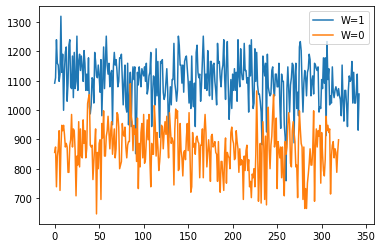

In [66]:
# Write the code here.
# Clue : you have to create a new binary treatment variable through the position we adopt.
dataset["educ_binary"] = (dataset.educ > 12).astype(int)
model_4 = smf.ols('wage ~ educ_binary + IQ', data=dataset)
result = model_4.fit()
# result.summary().tables[1]

# Write the rest of the code here (the plot part):
plt.plot(result.get_prediction(dataset[dataset["educ_binary"] == 1][['IQ', "educ_binary"]]).predicted_mean, label="W=1")
plt.plot(result.get_prediction(dataset[dataset["educ_binary"] == 0][['IQ', "educ_binary"]]).predicted_mean, label="W=0")
plt.legend()
plt.show()

In [69]:
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,914.2488,23.002,39.747,0.000,869.084,959.414
educ_binary,143.4754,33.963,4.224,0.000,76.786,210.165
IQ,6.1556,1.156,5.323,0.000,3.885,8.426


<div class="alert alert-block alert-success">

**Question 10.** Implement the regression : $Y_i = \beta_0 + \beta_1W_i + \beta_2IQ_i + \beta_3IQ_iW_i +  \epsilon_i $ and plot the two conditional responses $\mathbb{E}(Y_i| W_i =1, IQ)$ and $\mathbb{E}(Y_i| W_i =0, IQ)$ and derive CATE. The associated regression model will be called `m`. Note that the CATE is written as $\tau(IQ) = \beta_1 + \beta_3IQ $.
</div>

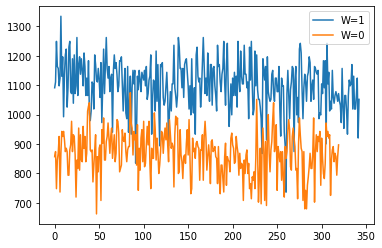

In [70]:
m = smf.ols('wage ~ educ_binary + IQ + educ_binary * IQ', data=dataset)
result_5 = m.fit()

# Write the rest of the code here (the plot part):
plt.plot(result_5.get_prediction(dataset[dataset["educ_binary"] == 1][['IQ', "educ_binary"]]).predicted_mean, label="W=1")
plt.plot(result_5.get_prediction(dataset[dataset["educ_binary"] == 0][['IQ', "educ_binary"]]).predicted_mean, label="W=0")
plt.legend()
plt.show()

In [68]:
result_5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,911.0924,24.578,37.070,0.000,862.832,959.353
educ_binary,143.7525,33.994,4.229,0.000,77.003,210.502
IQ,5.7271,1.646,3.480,0.001,2.495,8.959
educ_binary:IQ,0.8476,2.315,0.366,0.714,-3.697,5.392


In [74]:
print(f"CATE: ", (result_5.params[1] + result_5.params[3] * dataset["IQ"]).mean()) 

CATE:  143.75251594201336
